## Laboratorium 4

### Cel ćwiczenia
Celem ćwiczenia jest zastosowanie metody selekcji cech w klasyfikacji liści, a następnie przeprowadzenie klasyfikacji za pomocą klasyfikatora *k*NN.
Dodatkowo należy wyświetlić wyniki klasyfikacji w postaci macierzy pomyłek.

### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab[xx].ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```



### Zadanie 1

* Wybierz 10 pierwszych gatunków liści (będziesz je używać w kolejnych zadaniach) o identyfikatorach: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10.
* Znormalizuj dane w zakresie 0-1.

### Zadanie 2
* Przeprowadź selekcję cech.
> Możesz wykorzystać bibliotekę [scikit-learn](https://scikit-learn.org/stable/modules/feature_selection.html) (np. [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)).
* Dla każdej liczby cech (1-14) przeprowadz selekcje cech. Nastepnie wykonaj klasyfikacje klasyfikatorem *k*NN i znajdź optymalne *k*.
* Wyświetl wykres, gdzie na osi X znajduje się liczba cech, a na osi Y najwyższa osiągnięta dokładność (*accuracy*).
* Podaj dla jakiej liczby cech (i dla których cech) oraz dla jakiego *k* osiągnąłeś najlepszy wynik (*accuracy*).

### Zadanie 3
* Wyświetl tablicę pomyłek.

> Podpowiedź: Do wyświetlenia tablicy pomyłek możesz użyć funkcji [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) oraz [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) z biblioteki `sklearn`.

**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość).**

Przykład czego nie robić (na podstawie tablicy pomyłek):

**Źle** (kolumny ani wiersze nie są opisane):
```
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```



In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

chosen_classes = np.arange(1, 11)
train_1 = train[np.isin(train[:, 0], chosen_classes)]
test_1 = test[np.isin(test[:, 0], chosen_classes)]


X_train = train_1[:, 2:]
y_train = train_1[:, 0]
X_test = test_1[:, 2:]
y_test = test_1[:, 0]

# features = [1,2]
# print(X_train)
# print(X_train[:, features])

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Acc: 0.816247582205029 for k=14
0.816247582205029
Najwieksza dokladnosc: 0.8143 dla i = 14


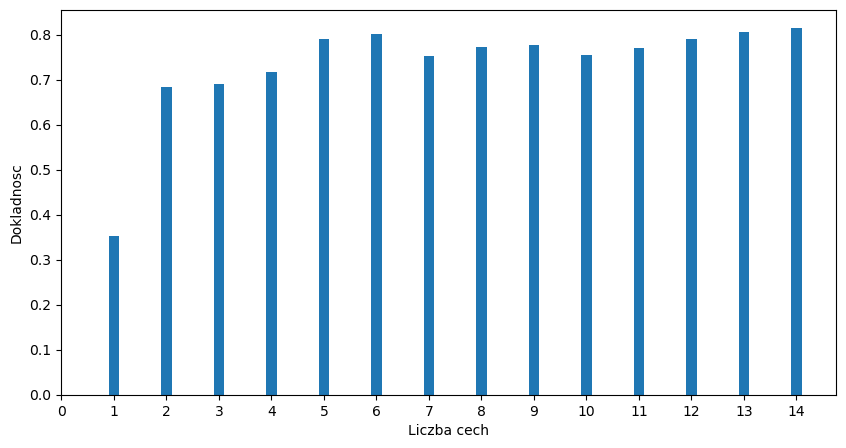

In [4]:
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import defaultdict
accuracy_list = []
accuracy_dict = defaultdict(int)


for i in range(1, 15):
    selector = SelectKBest(k=i)
    selector.fit_transform(X_train, y_train)

    X_train_best = selector.transform(X_train)
    X_test_best = selector.transform(X_test)
    
    best_accuracy = 0
    best_y_pred = 0
    best_k = 0
    for j in range(1, 20):
        neigh = KNeighborsClassifier(n_neighbors=j)
        neigh.fit(X_train_best, y_train)
        y_pred = neigh.predict(X_test_best)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_list.append(accuracy)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = j
            best_y_pred = y_pred
        accuracy_dict[i] = accuracy
print(f'Acc: {best_accuracy} for k={best_k}')
print(max(accuracy_list))


plt.figure(figsize=(10,5))
plt.bar(accuracy_dict.keys(), accuracy_dict.values(), width=0.2)
plt.xticks(range(len(accuracy_dict.keys()) + 1), np.arange(0, 15))
plt.ylabel('Dokladnosc')
plt.xlabel('Liczba cech')

max_accuracy = max(list(accuracy_dict.values()))
max_i = [i for i in accuracy_dict if accuracy_dict[i]==max_accuracy][0]
print(f'Najwieksza dokladnosc: {round(max_accuracy, 4)} dla i = {max_i}')

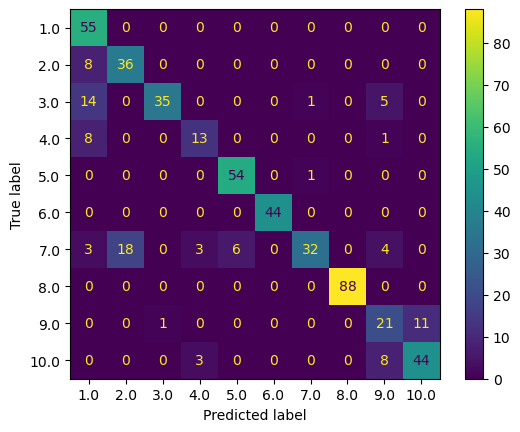

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, best_y_pred, labels=neigh.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()